In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits

Load dataset from sklearn ready made handwritten digit dataset 

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [29]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

<Figure size 640x480 with 0 Axes>

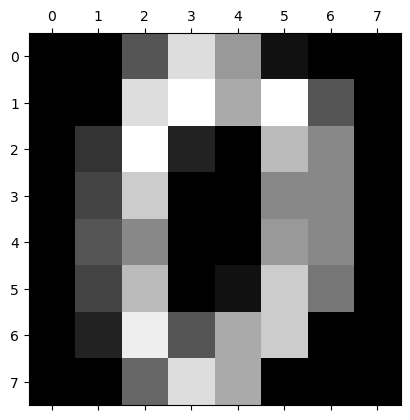

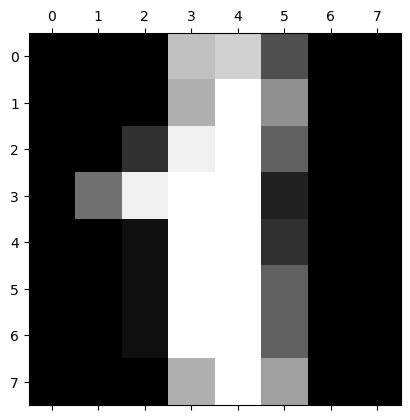

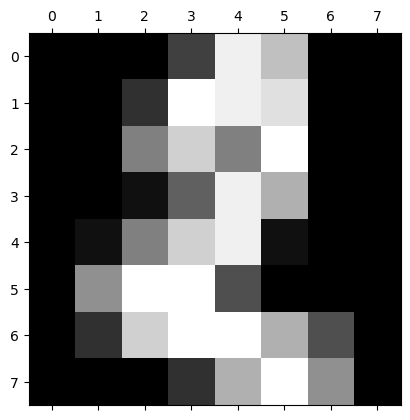

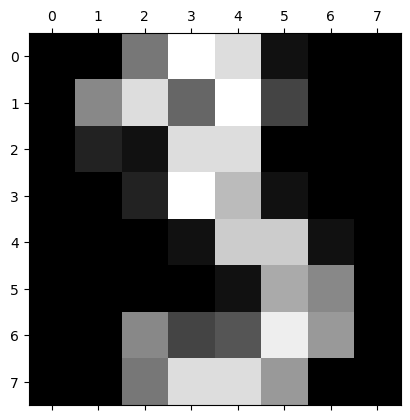

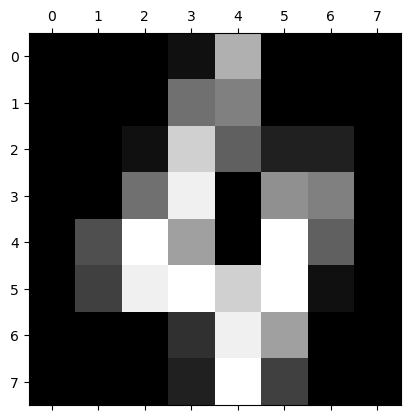

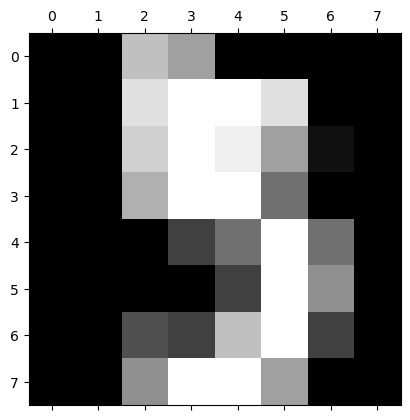

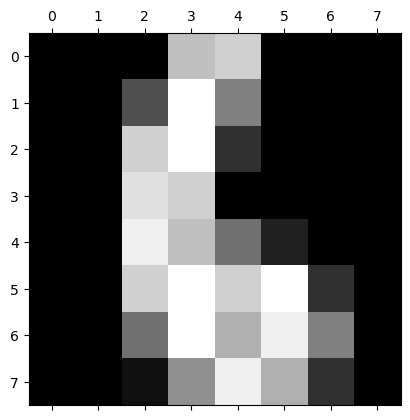

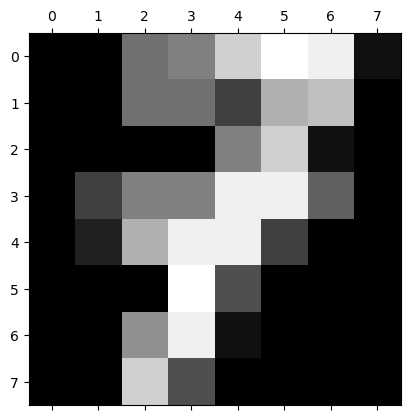

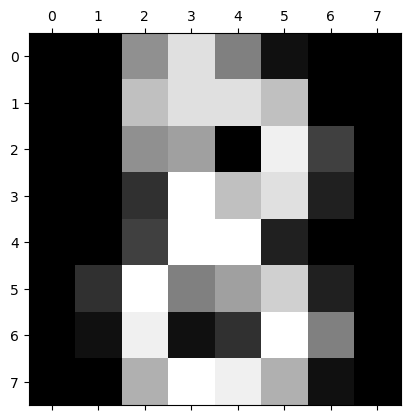

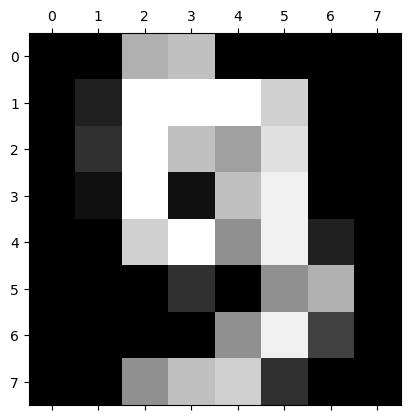

In [48]:
plt.gray()
for i in range(10):
    plt.matshow(digits.images[i])

In [50]:
digits.target[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [51]:
digits.target_names[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [52]:
from sklearn.model_selection import train_test_split

In [55]:
X = digits.data
y = digits.target

Training our model using Logistic Regression

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [63]:
from sklearn.linear_model import LogisticRegression

In [65]:
model = LogisticRegression()

In [66]:
model.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
my_model = model.predict(X_test)

In [68]:
model.score(X_test, y_test)

0.9611111111111111

In [108]:
from sklearn.metrics import accuracy_score
# Calculate accuracy using scikit-learn's accuracy_score
accuracy = accuracy_score(y_test, my_model)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9611111111111111


In [109]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, my_model)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[44  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  1  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  2  0  0  1  0]
 [ 0  1  0  0 29  0  0  0  0  0]
 [ 0  0  0  2  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 31  0  0  0]
 [ 0  0  0  1  0  0  0 26  0  1]
 [ 0  2  0  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  2 36]]


Our model has an accuracy of 96% which is pretty good

In [73]:
model.predict(digits.data[0:10])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Let's visualize our model with confusion matrix to know where our model has predicted right and wrong

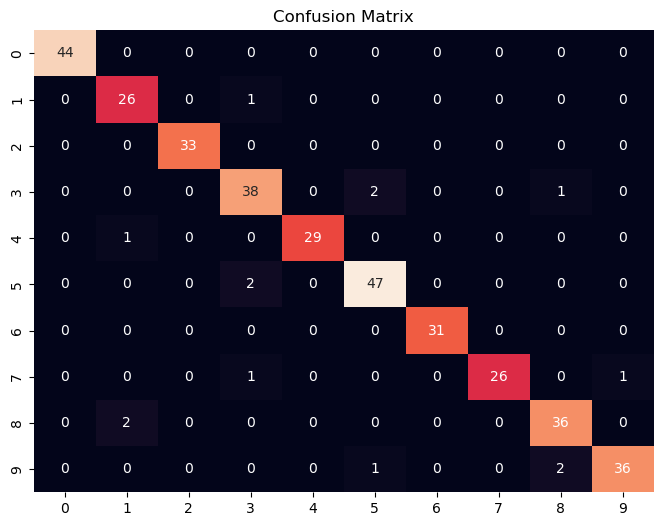

In [90]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, my_model)

# Ploting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cbar=False)
plt.xlabel=('Predicted')
yticklabels=['Actual']
plt.title('Confusion Matrix')
plt.show()

Lets find the metrics from the matrix

In [103]:
import numpy as np

# 'conf_matrix' is our 10x10 confusion matrix
conf_matrix = np.array([[44,0,0,0,0,0,0,0,0,0],
                        [0,26,0,1,0,0,0,0,0,0],
                        [0,0,33,0,0,0,0,0,0,0],
                        [0,0,0,38,0,2,0,0,1,0],
                        [0,1,0,0,29,0,0,0,0,0],
                        [0,0,0,2,0,47,0,0,0,0],
                        [0,0,0,0,0,0,31,0,0,0],
                        [0,0,0,1,0,0,0,26,0,1],
                        [0,2,0,0,0,0,0,0,36,0],
                        [0,0,0,0,0,1,0,0,2,36]])

# Calculate TP, TN, FP, FN for each class
class_count = conf_matrix.shape[0]
for i in range(class_count):
    TP = conf_matrix[i, i]
    FN = np.sum(conf_matrix[i, :]) - TP
    FP = np.sum(conf_matrix[:, i]) - TP
    TN = np.sum(conf_matrix) - (TP + FN + FP)

    print(f"For class {i}:")
    print(f"True Positive (TP): {TP}")
    print(f"False Negative (FN): {FN}")
    print(f"False Positive (FP): {FP}")
    print(f"True Negative (TN): {TN}")
    print("----------------------")


For class 0:
True Positive (TP): 44
False Negative (FN): 0
False Positive (FP): 0
True Negative (TN): 316
----------------------
For class 1:
True Positive (TP): 26
False Negative (FN): 1
False Positive (FP): 3
True Negative (TN): 330
----------------------
For class 2:
True Positive (TP): 33
False Negative (FN): 0
False Positive (FP): 0
True Negative (TN): 327
----------------------
For class 3:
True Positive (TP): 38
False Negative (FN): 3
False Positive (FP): 4
True Negative (TN): 315
----------------------
For class 4:
True Positive (TP): 29
False Negative (FN): 1
False Positive (FP): 0
True Negative (TN): 330
----------------------
For class 5:
True Positive (TP): 47
False Negative (FN): 2
False Positive (FP): 3
True Negative (TN): 308
----------------------
For class 6:
True Positive (TP): 31
False Negative (FN): 0
False Positive (FP): 0
True Negative (TN): 329
----------------------
For class 7:
True Positive (TP): 26
False Negative (FN): 2
False Positive (FP): 0
True Negative (

In [111]:
# Calculate total number of instances
total_instances = np.sum(conf_matrix)

# Calculate the sum of True Positives (TP) for all classes
total_TP = np.sum(TP)

# Calculate accuracy
accuracy = total_TP / total_instances

# Display the accuracy
print(f"Accuracy: {accuracy}")


Accuracy: 0.9611111111111111


In [113]:
# Calculate precision, recall, F1 score, specificity, and balanced accuracy for each class
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
specificity = TN / (TN + FP)
balanced_accuracy = (recall + specificity) / 2

# Display the metrics for each class
for i in range(num_classes):
    print(f"\nClass {i} Metrics:")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1 Score: {f1_score[i]}")
    print(f"Specificity: {specificity[i]}")
    print(f"Balanced Accuracy: {balanced_accuracy[i]}")



Class 0 Metrics:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0

Class 1 Metrics:
Precision: 0.896551724137931
Recall: 0.9629629629629629
F1 Score: 0.9285714285714286
Specificity: 0.990990990990991
Balanced Accuracy: 0.9769769769769769

Class 2 Metrics:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0

Class 3 Metrics:
Precision: 0.9047619047619048
Recall: 0.926829268292683
F1 Score: 0.9156626506024096
Specificity: 0.987460815047022
Balanced Accuracy: 0.9571450416698525

Class 4 Metrics:
Precision: 1.0
Recall: 0.9666666666666667
F1 Score: 0.983050847457627
Specificity: 1.0
Balanced Accuracy: 0.9833333333333334

Class 5 Metrics:
Precision: 0.94
Recall: 0.9591836734693877
F1 Score: 0.9494949494949495
Specificity: 0.9903536977491961
Balanced Accuracy: 0.9747686856092919

Class 6 Metrics:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Specificity: 1.0
Balanced Accuracy: 1.0

Class 7 Metrics:
Precision: 1.0
Recall: 0.9285714285714

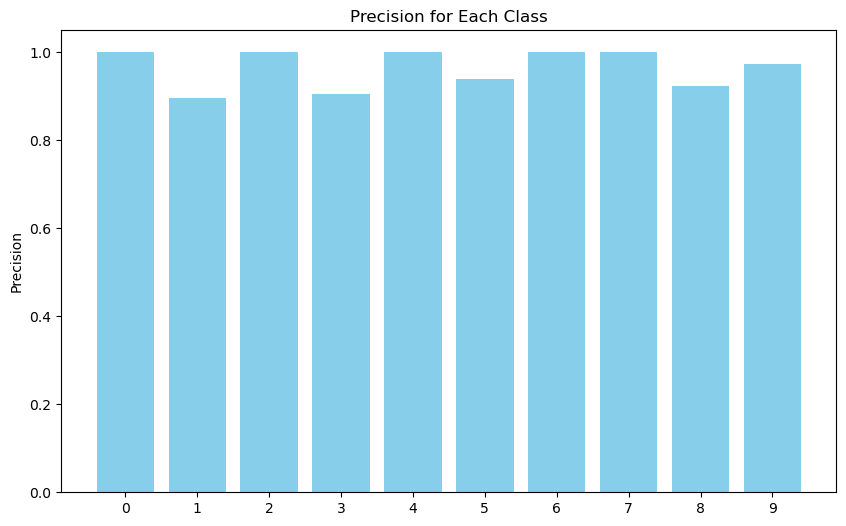

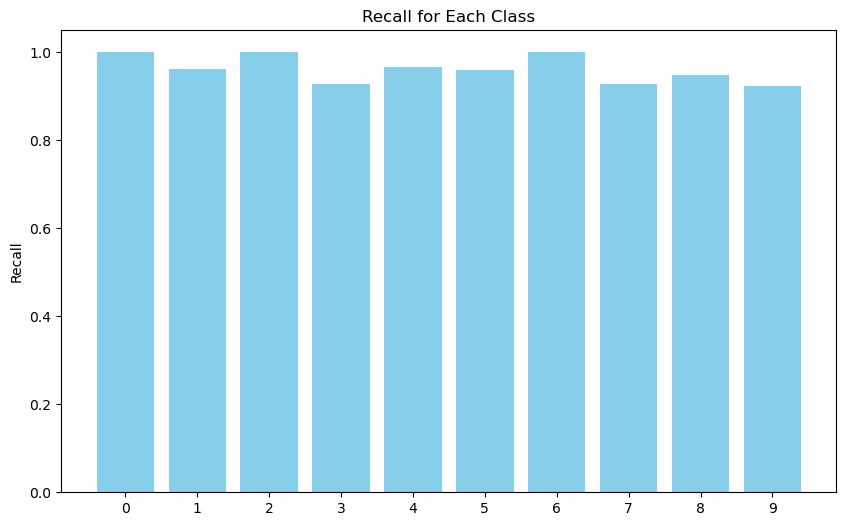

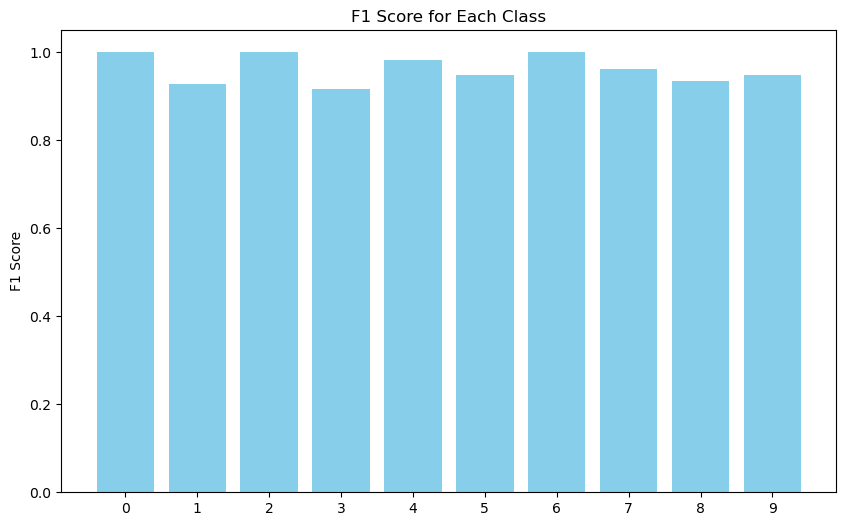

In [120]:
metrics_names = ['Precision', 'Recall', 'F1 Score', 'Class']
metrics_values = [precision, recall, f1_score]

for i in range(3):
    plt.figure(figsize=(10, 6))
    plt.bar(range(num_classes), metrics_values[i], color='skyblue')
    plt.xticks(range(num_classes), labels=range(num_classes))
    plt.ylabel(metrics_names[i])
    plt.title(f'{metrics_names[i]} for Each Class')
    plt.show()

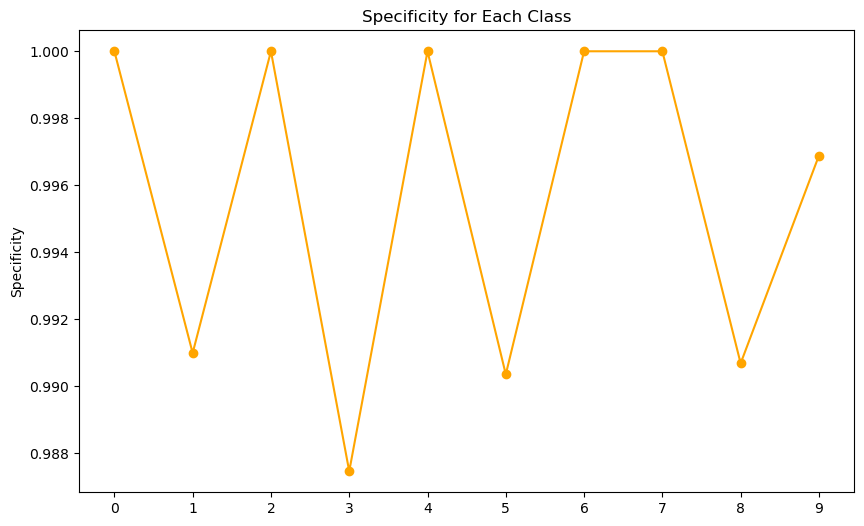

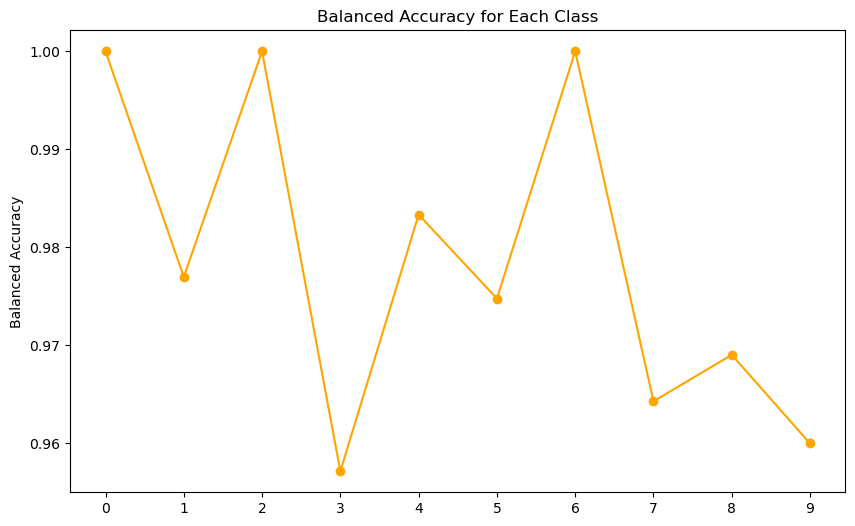

In [122]:
# 3. Line Plot for Specificity and Balanced Accuracy
metrics_names = ['Specificity', 'Balanced Accuracy']
metrics_values = [specificity, balanced_accuracy]

for i in range(2):
    plt.figure(figsize=(10, 6))
    plt.plot(range(num_classes), metrics_values[i], marker='o', linestyle='-', color='orange')
    plt.xticks(range(num_classes), labels=range(num_classes))
    #plt.xlabel('Class')
    plt.ylabel(metrics_names[i])
    plt.title(f'{metrics_names[i]} for Each Class')
    plt.show()